# Model metrics
The metrics that evaluate prediction models serve to measure the effectiveness and accuracy of the models developed. These metrics allow understanding how well a model is performing in terms of its predictions, facilitating decision making on adjustments, improvements and the selection of the most appropriate model. 

Add the path to the sys

In [1]:
import sys
import os
from dotenv import load_dotenv

load_dotenv()
work_path = os.getenv('WORK_PATH')

sys.path.append(work_path)

Import the necessary libraries

In [2]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sqlalchemy.orm import aliased, sessionmaker
from src.database.connection import config_loader
from src.models.models import Model_Prediction

A connection to a database is established using connection and a SQLAlchemy session is created using sessionmaker linked to that connection. This streamlines database operations in the program.

In [3]:
connection = config_loader()

Session = sessionmaker(bind=config_loader)
session = Session()

INFO:root:Connected successfully to Workshop-3 database


Using SQLAlchemy, a query is made to the table to read and load the data into a DataFrame.

In [4]:
query = session.query(Model_Prediction).statement
df = pd.read_sql(query, connection)
df.head(5)

,id,gdp_per_capita,social_support,health_life_expectancy,freedom,generosity,perceptions_of_corruption,africa,asia,europe,north_america,oceania,south_america,happiness_score,prediction_happiness_score
0,1,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,0.0,1.0,0.0,0.0,0.0,0.0,5.920,6.32493
1,2,0.274000,0.757000,0.505000,0.142000,0.275000,0.078000,1.0,0.0,0.0,0.0,0.0,0.0,3.973,4.12309
2,3,0.191000,0.560000,0.495000,0.443000,0.218000,0.089000,1.0,0.0,0.0,0.0,0.0,0.0,3.410,4.16293
3,4,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,0.0,1.0,0.0,0.0,0.0,0.0,5.971,5.35903
4,5,1.053510,1.248230,0.787230,0.449740,0.114510,0.084840,0.0,0.0,0.0,0.0,0.0,1.0,6.574,6.42585


In [5]:
y_test = df['happiness_score']
y_pred = df['prediction_happiness_score']

##### Coefficient of determination R² 

In [6]:
r2 = r2_score(y_test, y_pred)

print("Coefficient of determination (R^2):", r2)

Coefficient of determination (R^2): 0.8784153060516785


The R² indicates the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. A value of 0.878 suggests that approximately 87.84% of the variability in the data is explained by the model. This is a good value, indicating that the model has a good fit to the data.

##### Mean Squared Error

In [7]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.1598583379521075


The MSE measures the mean squares of the errors, i.e., the difference between the predicted values and the actual values. An MSE of 0.1598 indicates that, on average, the model predictions deviate from the actual values by a square of approximately 0.1598. The lower the MSE, the better the model, because it indicates less error in the predictions.

##### Root Mean Squared Error

In [8]:
rmse = mse ** 0.5
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.39982288322719534


The RMSE is the square root of the MSE, which brings it to the same unit of measurement as the target variable. An RMSE of 0.3998 means that, on average, the deviation of model predictions from actual values is approximately 0.4 units. Like the MSE, a lower RMSE indicates better model performance.

##### Mean Absolute Error

In [9]:
mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.31819565708965547


The MAE measures the mean of the absolute errors between the predictions and the actual values. An MAE of 0.3182 indicates that, on average, the model predictions deviate from the actual values by approximately 0.3182 units. The MAE provides a more direct interpretation of the average error in the predictions.

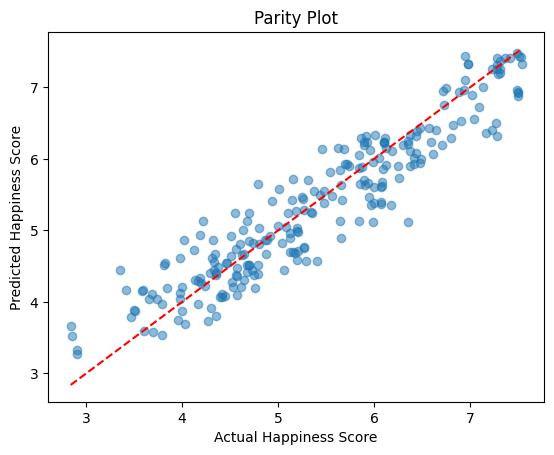

In [10]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Parity Plot')
plt.show()

Most of the points are close to the parity line, indicating that the model predicts the actual values fairly well. The parity plot provides clear visual validation that your model predicts the actual values effectively, with relatively small errors and no systematic bias. This supports the quantitative metrics and suggests that the model is well-fitted and robust.

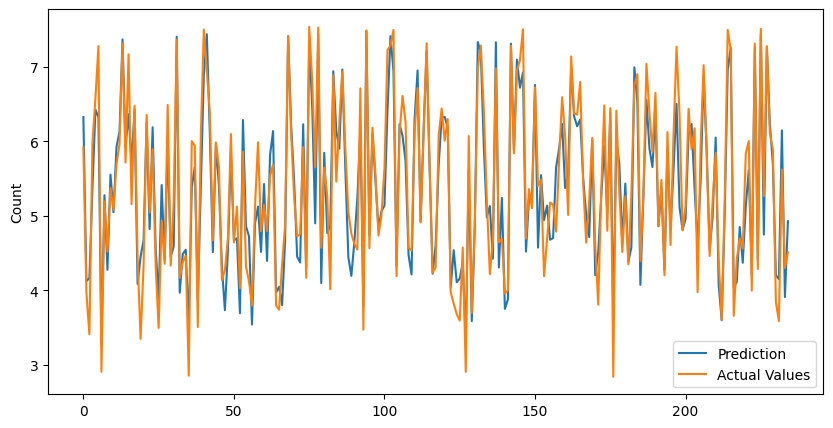

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(y_pred, label='Prediction')
plt.plot(y_test.values, label='Actual Values')
plt.ylabel('Count')
plt.legend()
plt.show()

The lines of predictions and actual values are quite close and, in many cases, overlap. This indicates that the model is doing a good job of following the trend of the actual data.
The oscillations and peaks in the time series on both lines are similar, suggesting that the model captures the variations in the data well.

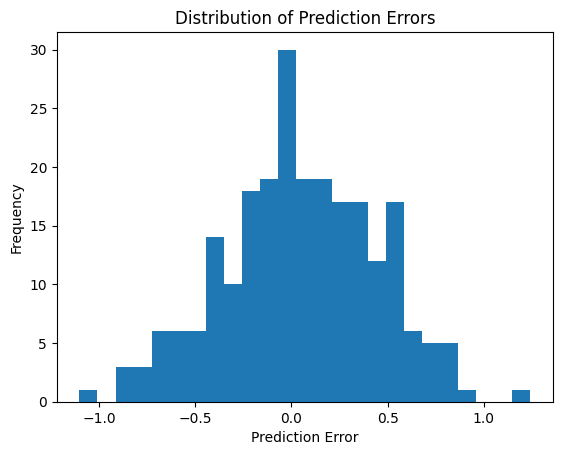

In [12]:
errors = y_test - y_pred

plt.hist(errors, bins=25)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

The histogram shows a distribution centered around 0. This is a good indication because it suggests that the prediction errors are symmetrically distributed around zero, which means that the model does not have a systematic bias towards overpredictions or underpredictions. Most of the errors are close to 0, which is ideal. It indicates that, on average, the model's predictions are fairly accurate. Furthermore, the errors are within the range of -0.5 to 0.5, which implies that the errors are not very large. This is consistent with the low values of MSE, RMSE and MAE that you obtained earlier.